In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
path = 'bitly.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [5]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [7]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [8]:
len(time_zones)

3440

In [9]:
d = get_counts2(time_zones)
d['America/New_York']

1251

In [10]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [11]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [12]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [13]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [14]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York 1251
 521
America/Chicago 400
America/Los_Angeles 382
America/Denver 191
Europe/London 74
Asia/Tokyo 37
Pacific/Honolulu 36
Europe/Madrid 35
America/Sao_Paulo 33
Name: tz, dtype: int64

In [15]:
clean_tz = frame['tz'].fillna('Brak danych')
clean_tz[clean_tz==''] = 'Nieznana'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York 1251
Nieznana 521
America/Chicago 400
America/Los_Angeles 382
America/Denver 191
Brak danych 120
Europe/London 74
Asia/Tokyo 37
Pacific/Honolulu 36
Europe/Madrid 35
Name: tz, dtype: int64

<AxesSubplot:>

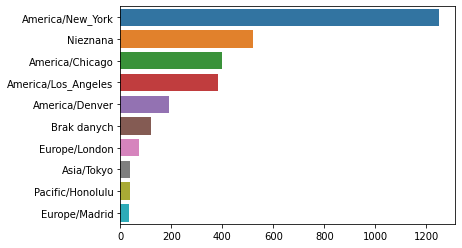

In [16]:
import seaborn as sns
subset  = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [17]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [18]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [19]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [20]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0 Mozilla/5.0
1 GoogleMaps/RochesterNY
2 Mozilla/4.0
3 Mozilla/5.0
4 Mozilla/5.0
dtype: object

In [21]:
results.value_counts()[:8]

Mozilla/5.0 2594
Mozilla/4.0 601
GoogleMaps/RochesterNY 121
Opera/9.80 34
TEST_INTERNET_AGENT 24
GoogleProducer 21
Mozilla/6.0 5
BlackBerry8520/5.0.0.681 4
dtype: int64

In [24]:
cframe = frame[frame.a.notnull()]
#print(cframe['a'].str.contains('Windows'))
cframe = cframe.copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Inny system')
#cframe.insert(column='os',value='',loc=1)
cframe['os'][:5]

0 Windows
1 Inny system
2 Windows
3 Inny system
4 Windows
Name: os, dtype: object

In [25]:
by_tz_os = cframe.groupby(['tz','os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Inny system,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0
